<a href="https://colab.research.google.com/github/aditya7600/DAI-101/blob/main/ADITYA_23112006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five rows:
  Startup Name    Industry  Funding Rounds  Investment Amount (USD)  \
0    Startup_1  Blockchain               8             1.335166e+09   
1    Startup_2        SaaS               2             2.781498e+09   
2    Startup_3      EdTech              10             3.309032e+09   
3    Startup_4     Fintech               5             4.050196e+09   
4    Startup_5      EdTech               9             1.645080e+09   

   Valuation (USD)  Number of Investors    Country  Year Founded  \
0     6.621448e+09                   50    Germany          2012   
1     8.363214e+09                   36         UK          2006   
2     1.548270e+10                   39  Singapore          2016   
3     1.268253e+10                   44     France          2021   
4     6.887966e+09                   48      India          2011   

   Growth Rate (%)  
0            77.10  
1           105.52  
2           190.47  
3             9.44  
4           192.00  

Dataset Overview:
<c

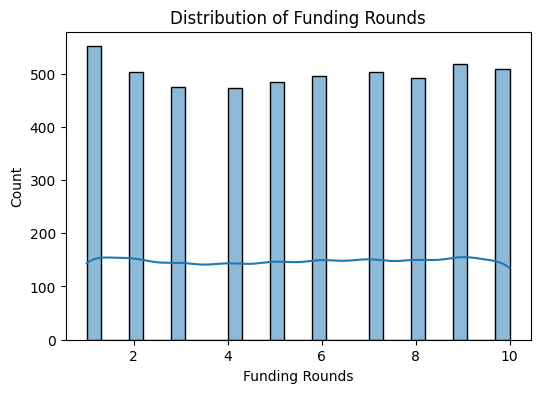

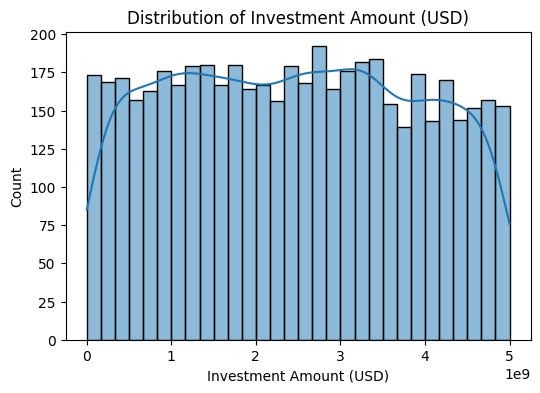

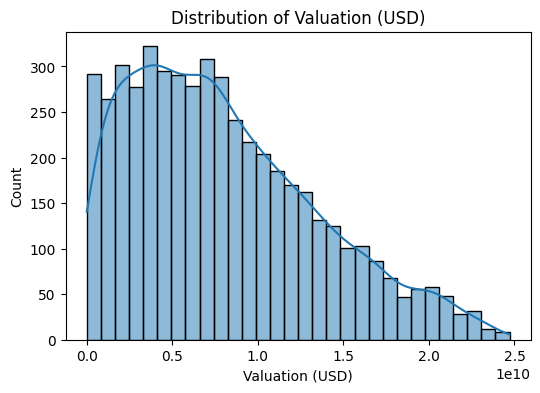

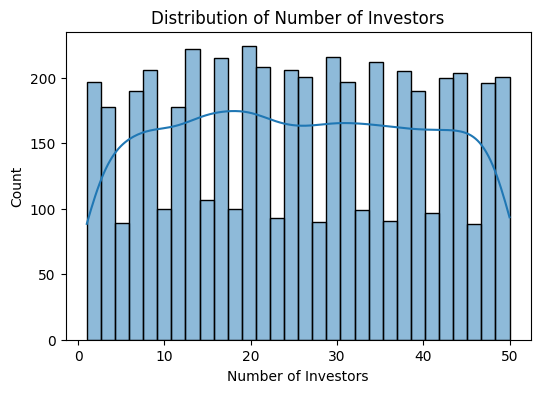

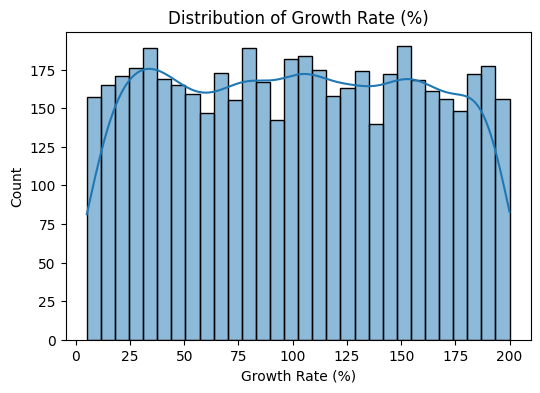

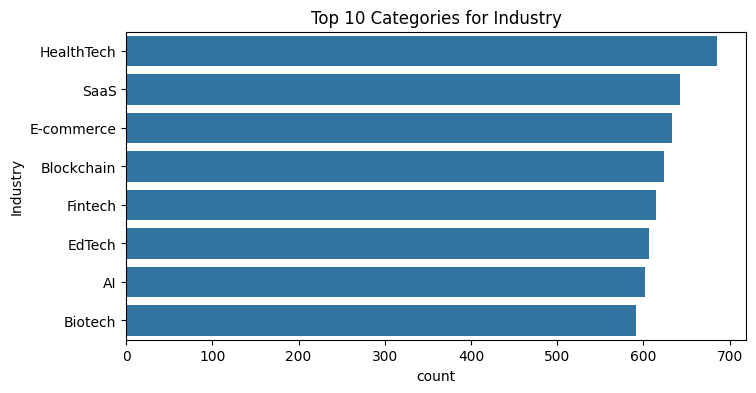

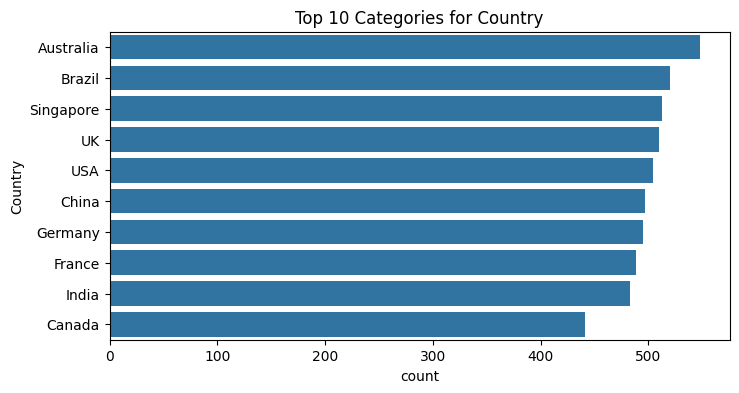

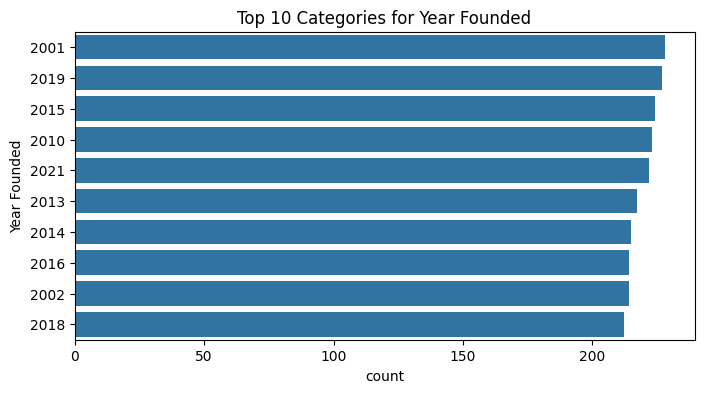

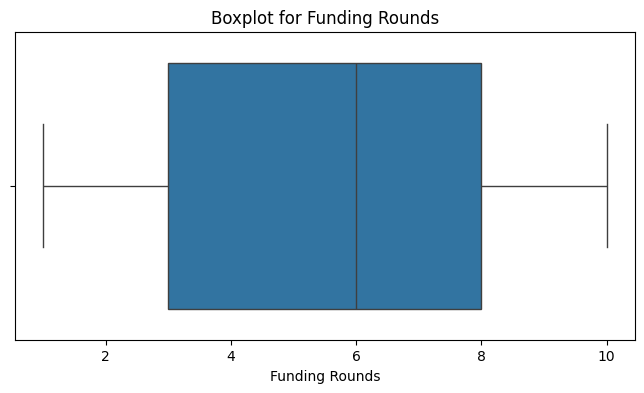

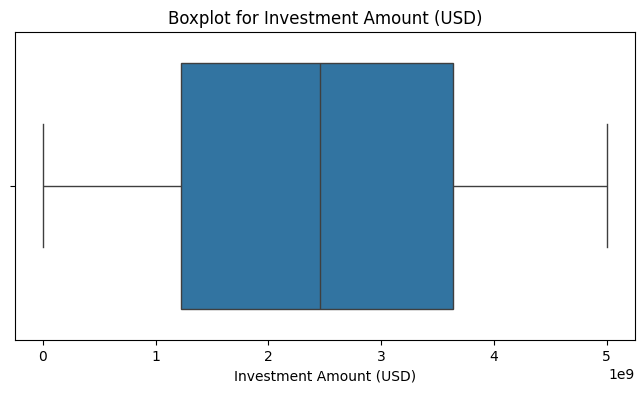

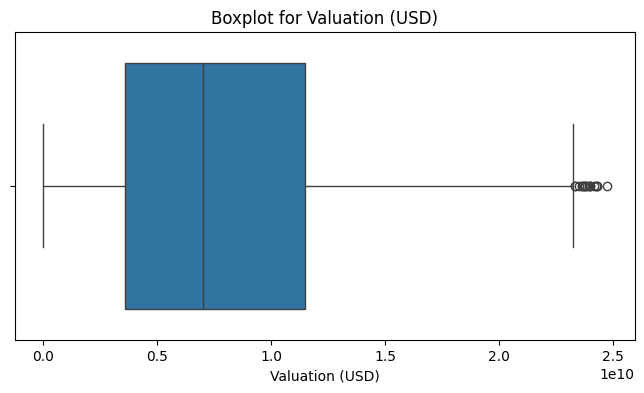

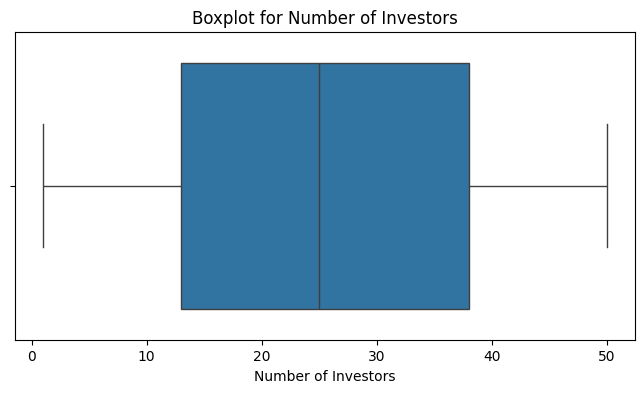

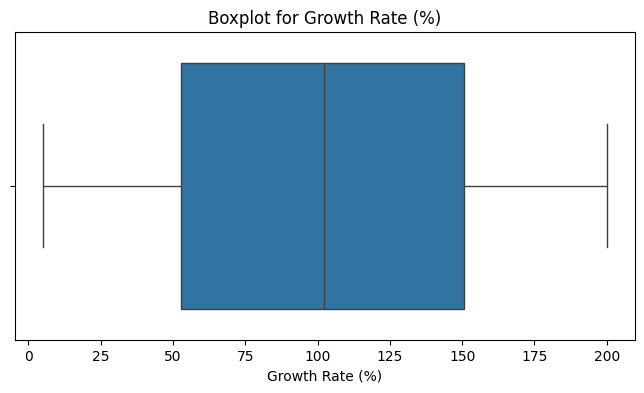


Original Shape: (5000, 9), After Outlier Removal: (4999, 9)


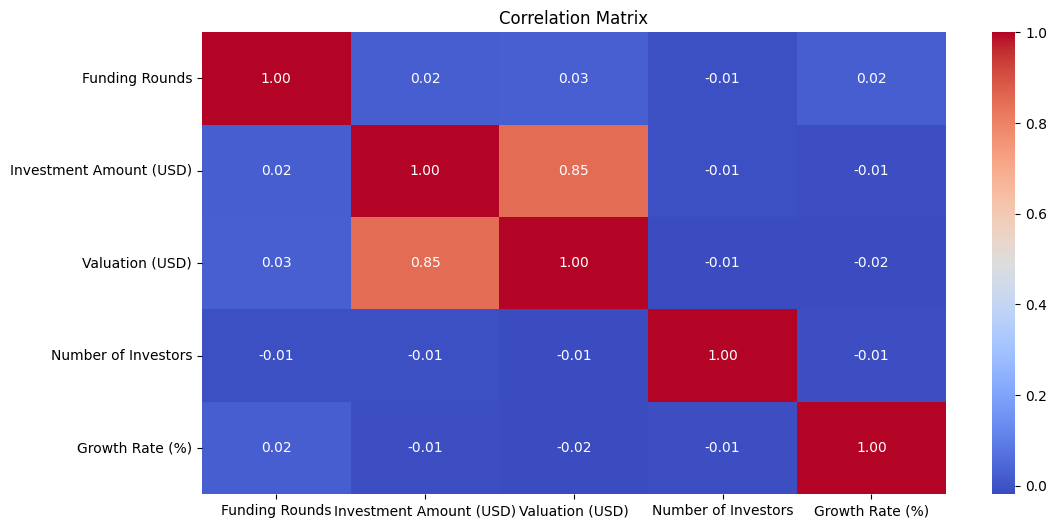

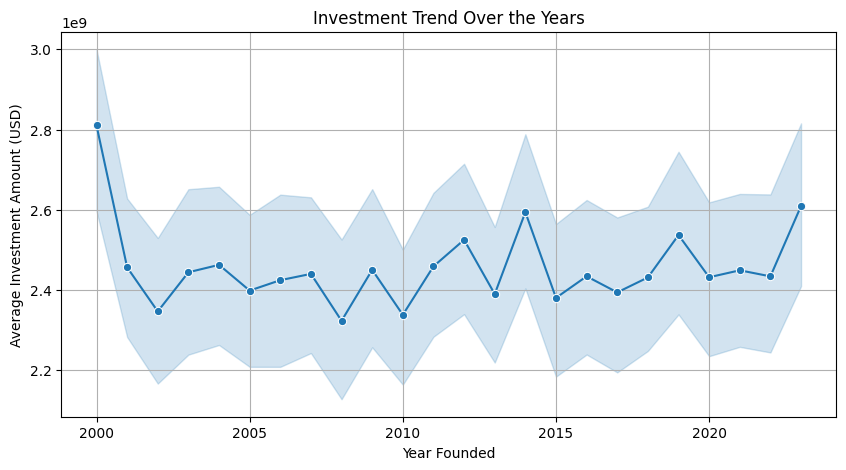

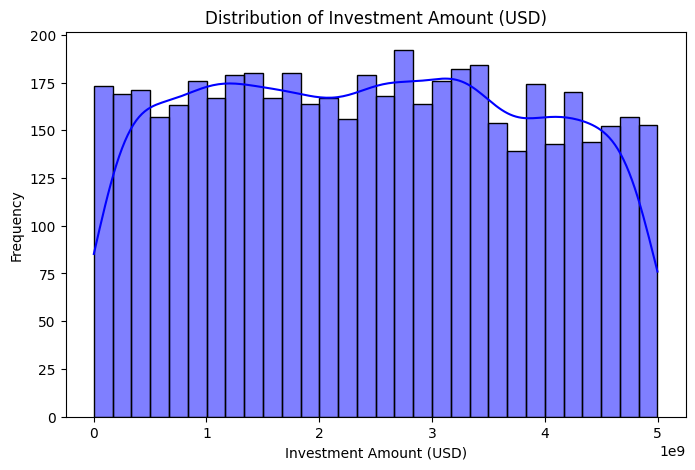

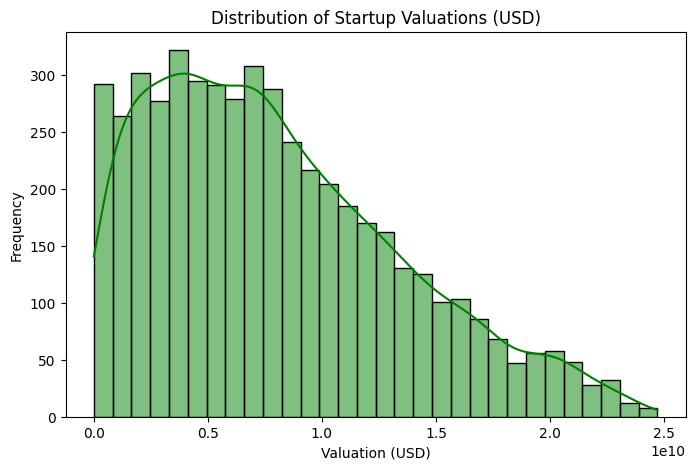

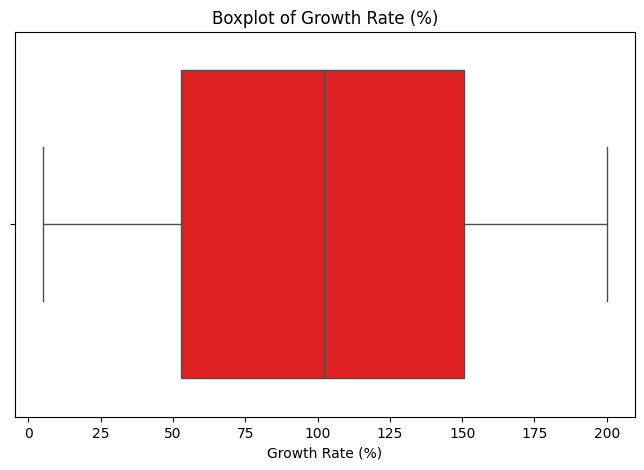

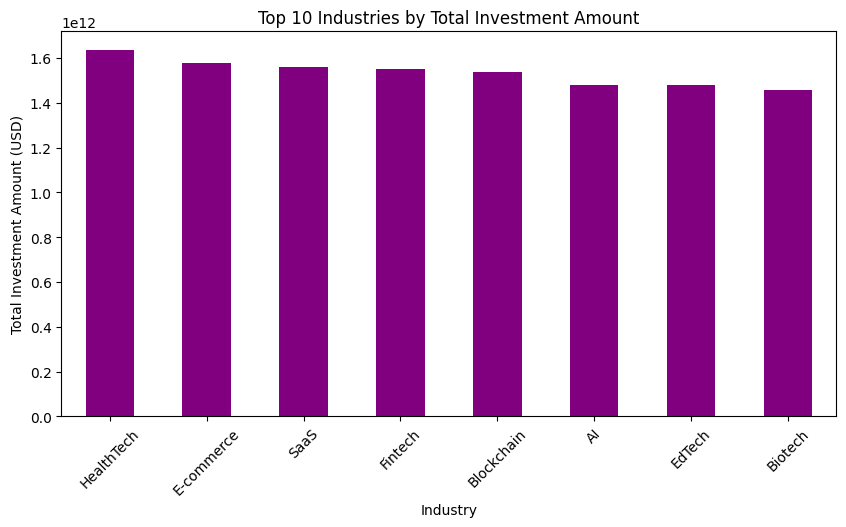

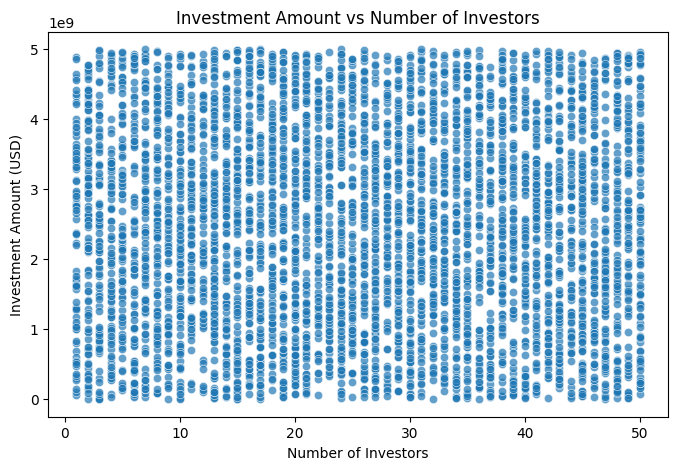

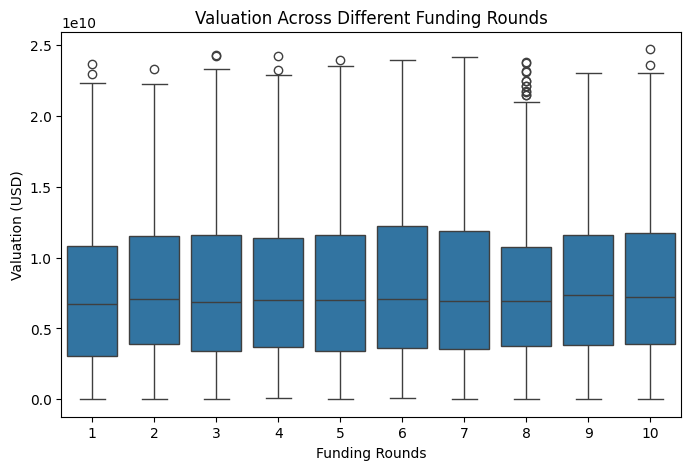

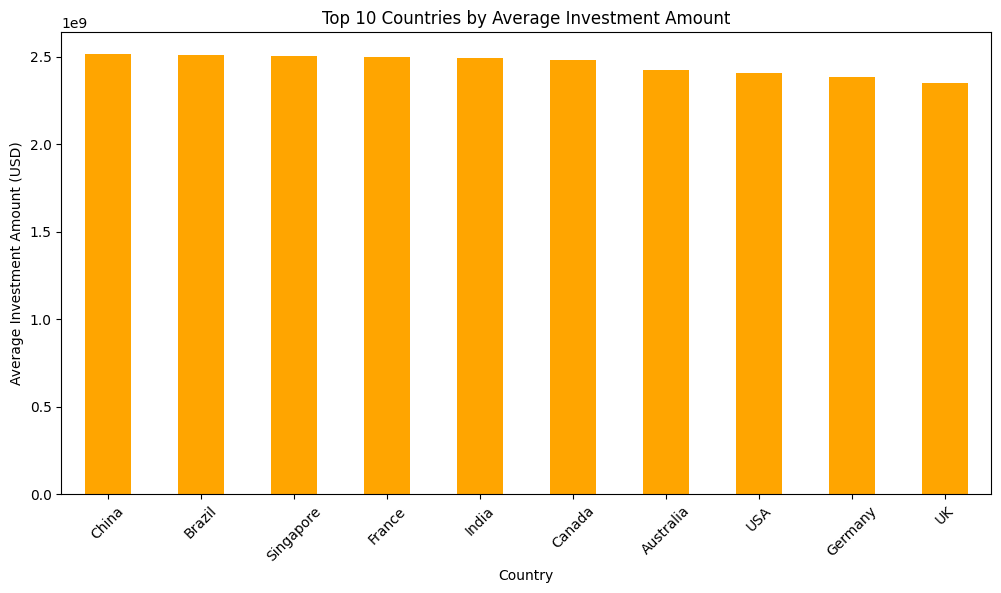

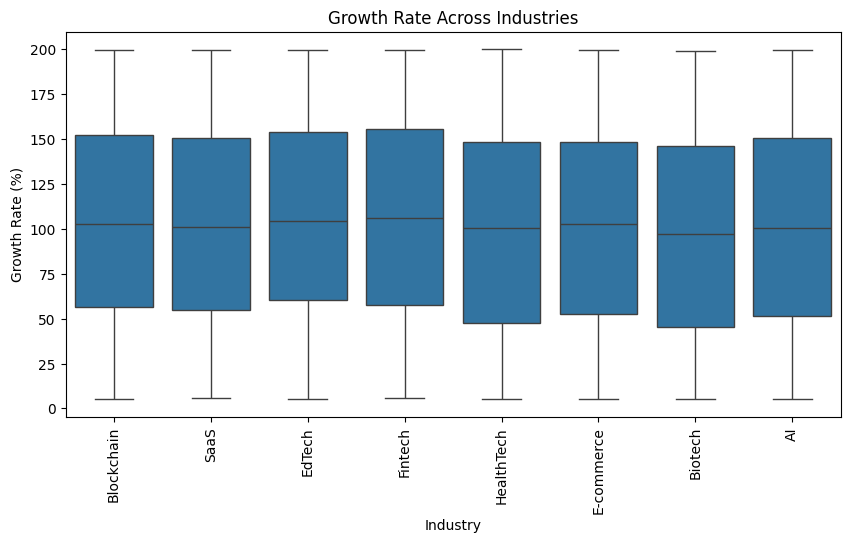

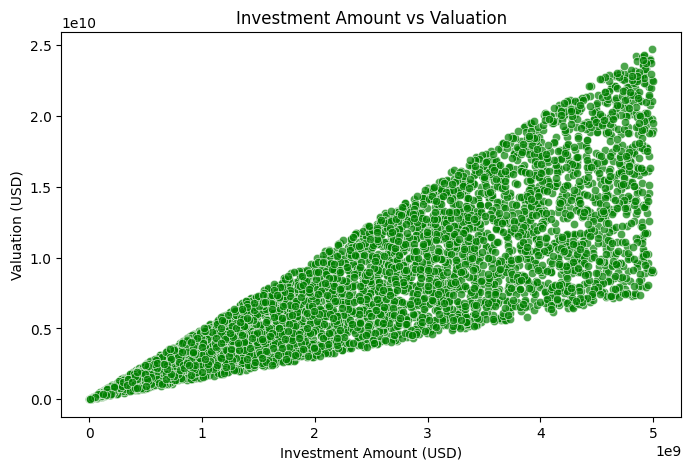

<ipython-input-7-cf7080b0c66b>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Funding Rounds', y='Growth Rate (%)', palette='coolwarm')


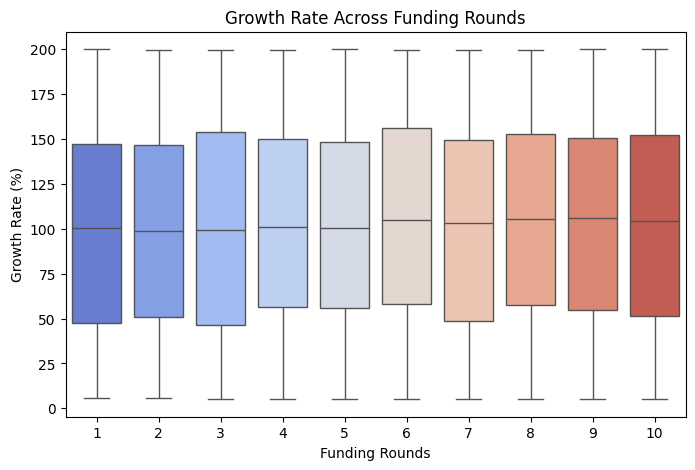

Analysis Completed.


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("/content/startup_growth_investment_data.csv")

# Display basic info
print("First five rows:")
print(df.head())
print("\nDataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

# UNIVARIATE ANALYSIS
num_cols = ['Funding Rounds', 'Investment Amount (USD)', 'Valuation (USD)', 'Number of Investors', 'Growth Rate (%)']
cat_cols = ['Industry', 'Country', 'Year Founded']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f'Top 10 Categories for {col}')
    plt.show()

# OUTLIER DETECTION
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Removing extreme outliers
df_no_outliers = df[(np.abs(zscore(df[num_cols])) < 3).all(axis=1)]
print(f"\nOriginal Shape: {df.shape}, After Outlier Removal: {df_no_outliers.shape}")

# MULTIVARIATE ANALYSIS
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Investment Trends Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year Founded', y='Investment Amount (USD)', estimator='mean', marker='o')
plt.title("Investment Trend Over the Years")
plt.xlabel("Year Founded")
plt.ylabel("Average Investment Amount (USD)")
plt.grid()
plt.show()

# Additional Visualizations

# Investment Amount Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Investment Amount (USD)'], kde=True, bins=30, color='blue')
plt.title("Distribution of Investment Amount (USD)")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Frequency")
plt.show()

# Valuation Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Valuation (USD)'], kde=True, bins=30, color='green')
plt.title("Distribution of Startup Valuations (USD)")
plt.xlabel("Valuation (USD)")
plt.ylabel("Frequency")
plt.show()

# Growth Rate Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Growth Rate (%)'], color='red')
plt.title("Boxplot of Growth Rate (%)")
plt.xlabel("Growth Rate (%)")
plt.show()

# Top 10 Industries by Investment Amount
top_industries = df.groupby('Industry')['Investment Amount (USD)'].sum().nlargest(10)
plt.figure(figsize=(10, 5))
top_industries.plot(kind='bar', color='purple')
plt.title("Top 10 Industries by Total Investment Amount")
plt.xlabel("Industry")
plt.ylabel("Total Investment Amount (USD)")
plt.xticks(rotation=45)
plt.show()

# New Visualizations

# Number of Investors vs Investment Amount
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Number of Investors', y='Investment Amount (USD)', alpha=0.7)
plt.title("Investment Amount vs Number of Investors")
plt.xlabel("Number of Investors")
plt.ylabel("Investment Amount (USD)")
plt.show()

# Funding Rounds vs Valuation
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Funding Rounds', y='Valuation (USD)')
plt.title("Valuation Across Different Funding Rounds")
plt.xlabel("Funding Rounds")
plt.ylabel("Valuation (USD)")
plt.show()

# Country-wise Average Investment
plt.figure(figsize=(12, 6))
country_avg_investment = df.groupby('Country')['Investment Amount (USD)'].mean().nlargest(10)
country_avg_investment.plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Average Investment Amount")
plt.xlabel("Country")
plt.ylabel("Average Investment Amount (USD)")
plt.xticks(rotation=45)
plt.show()

# Industry-wise Growth Rate
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Industry', y='Growth Rate (%)')
plt.xticks(rotation=90)
plt.title("Growth Rate Across Industries")
plt.xlabel("Industry")
plt.ylabel("Growth Rate (%)")
plt.show()

# Investment Amount vs Valuation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Investment Amount (USD)', y='Valuation (USD)', alpha=0.7, color='green')
plt.title("Investment Amount vs Valuation")
plt.xlabel("Investment Amount (USD)")
plt.ylabel("Valuation (USD)")
plt.show()

# Funding Rounds vs Growth Rate
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Funding Rounds', y='Growth Rate (%)', palette='coolwarm')
plt.title("Growth Rate Across Funding Rounds")
plt.xlabel("Funding Rounds")
plt.ylabel("Growth Rate (%)")
plt.show()

print("Analysis Completed.")

